In [1]:
# 必要なライブラリのインポート 
from sklearn.datasets import load_wine 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 

# データセットの準備 
wine = load_wine() 
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=41) 

# 決定木の適用（木の深さの制限なし, 分割基準をジニ不純度に設定） 
tree = DecisionTreeClassifier(max_depth=None, criterion='gini', random_state=41) 
tree.fit(X_train, y_train) 

# Accuracyの表示 
print(f'Train Accuracy: {tree.score(X_train, y_train):.3f}') 
print(f'Test Accuracy: {tree.score(X_test, y_test):.3f}') 

Train Accuracy: 1.000
Test Accuracy: 0.911


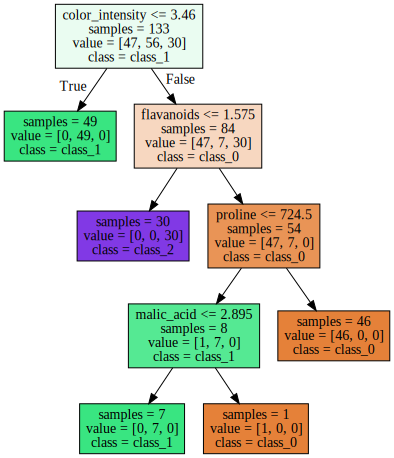

In [2]:
import graphviz 
from sklearn.tree import export_graphviz 

# Graphviz形式で決定木をエクスポート 
dot_data = export_graphviz(tree, out_file=None, impurity=False, filled=True, 
                           feature_names=wine.feature_names, class_names=wine.target_names) 

# Graphviz形式の決定木を表示 
graph = graphviz.Source(dot_data)   
graph 

In [3]:
# 決定木の適用（木の深さを3, 分割基準をジニ不純度に設定） 
tree = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=41) 
tree.fit(X_train, y_train) 

# Accuracyの表示 
print(f'Train Accuracy: {tree.score(X_train, y_train):.3f}') 
print(f'Test Accuracy: {tree.score(X_test, y_test):.3f}') 

Train Accuracy: 0.992
Test Accuracy: 0.933


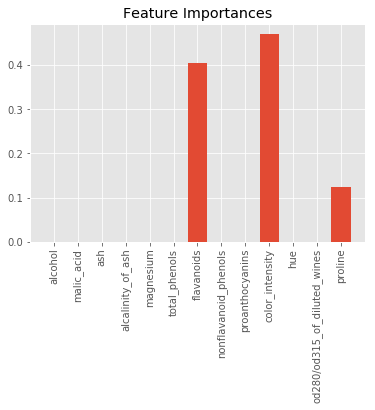

In [4]:
# 必要なライブラリのインポート 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('ggplot')

# 特徴量の重要度を可視化 
n_features = wine.data.shape[1] 
plt.title('Feature Importances') 
plt.bar(range(n_features), tree.feature_importances_, align='center') 
plt.xticks(range(n_features), wine.feature_names, rotation=90) 
plt.xlim([-1, X_train.shape[1]]) 
plt.show() 

In [5]:
# ランダムフォレストをインポート 
from sklearn.ensemble import RandomForestClassifier 

# ランダムフォレストの適用（決定木の数を7、特徴量の数を3、分割基準をジニ不純度に設定） 
forest = RandomForestClassifier(n_estimators=7, max_features=3, max_depth=3, 
                                criterion='gini', random_state=41) 
forest.fit(X_train, y_train) 

# Accuracyの表示 
print(f'Train Accuracy: {forest.score(X_train, y_train):.3f}') 
print(f'Test Accuracy: {forest.score(X_test, y_test):.3f}') 

Train Accuracy: 0.992
Test Accuracy: 0.978


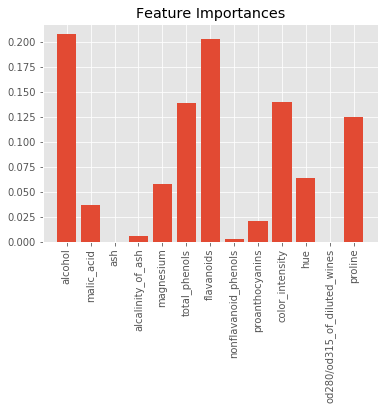

In [6]:
# 特徴量の重要度を可視化 
n_features = wine.data.shape[1] 
plt.title('Feature Importances') 
plt.bar(range(n_features), forest.feature_importances_, align='center') 
plt.xticks(range(n_features), wine.feature_names, rotation=90) 
plt.xlim([-1, X_train.shape[1]]) 
plt.show() 